# Notebook Title - Gradient Descent from Scratch for Ridge (L1) and Elastic Net (L1 + L2) Regression

In this notebook we will code gradient descent from scratch for Ridge and Elastic Net Regression.

For this notebook we will use a preprocessed version of Diamonds Dataset stored at data/diamond_preprocessed_v2.csv

For more details on dataset cleaning refer to notebook - linear_regression_using_ols_method.ipynb

# Gradient Descent for Ridge Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

In [2]:
diamonds_preprocessed = pd.read_csv('data/diamond_preprocessed_v2.csv')

In [3]:
diamonds_train = diamonds_preprocessed.sample(frac = 0.8)
diamonds_test = diamonds_preprocessed.drop(index = diamonds_train.index)

In [4]:
y_train = diamonds_train['price']
y_test = diamonds_test['price']

In [5]:
x_train = diamonds_train.drop(columns = ['price'])
x_test = diamonds_test.drop(columns = ['price'])

In [6]:
#Dropping columns with low correlation value
x_train.drop(columns = ['average us salary','number of diamonds mined (millions)','depth','cut_fair','cut_good','cut_ideal','cut_premium','cut_very good'], inplace = True)
x_test.drop(columns = ['average us salary','number of diamonds mined (millions)','depth','cut_fair','cut_good','cut_ideal','cut_premium','cut_very good'], inplace = True)

In [7]:
print("X_train dimensions : {0} and Y_train dimensions : {1}".format(x_train.shape,y_train.shape))
print("X_test dimensions : {0} and Y_test dimensions : {1}".format(x_test.shape,y_test.shape))

X_train dimensions : (38298, 19) and Y_train dimensions : (38298,)
X_test dimensions : (9575, 19) and Y_test dimensions : (9575,)


In [8]:
#Normalization of train dataset
x_train['table'] = x_train['table'].sub(x_train['table'].min()).div((x_train['table'].max()-x_train['table'].min()))
x_train['carat'] = x_train['carat'].sub(x_train['carat'].min()).div((x_train['carat'].max()-x_train['carat'].min()))
x_train['x'] = x_train['x'].sub(x_train['x'].min()).div((x_train['x'].max()-x_train['x'].min()))
x_train['y'] = x_train['y'].sub(x_train['y'].min()).div((x_train['y'].max()-x_train['y'].min()))
x_train['z'] = x_train['z'].sub(x_train['z'].min()).div((x_train['z'].max()-x_train['z'].min()))

In [9]:
#Normalization of test dataset
x_test['table'] = x_test['table'].sub(x_test['table'].min()).div((x_test['table'].max()-x_test['table'].min()))
x_test['carat'] = x_test['carat'].sub(x_test['carat'].min()).div((x_test['carat'].max()-x_test['carat'].min()))
x_test['x'] = x_test['x'].sub(x_test['x'].min()).div((x_test['x'].max()-x_test['x'].min()))
x_test['y'] = x_test['y'].sub(x_test['y'].min()).div((x_test['y'].max()-x_test['y'].min()))
x_test['z'] = x_test['z'].sub(x_test['z'].min()).div((x_test['z'].max()-x_test['z'].min()))

In [10]:
#Adding bias term to input features
x_test = np.hstack((np.ones((x_test.shape[0],1)),x_test))
x_train = np.hstack((np.ones((x_train.shape[0],1)),x_train))

In [11]:
def gradient_descent(W, iter_num = 10000, lr = 0.001, thresh = 0.01, ridge_lambda = 100):
    t1 = time.time()
    for i in range(iter_num):
        gradient = (np.dot((np.multiply(x_train,W.T).sum(axis = 1) - y_train),x_train).flatten() + ridge_lambda*W)/(y_train.shape[0])
        if np.all(lr*np.abs(gradient) < thresh):
            break
        W -= (lr)*gradient
    t2 = time.time()
    print("No. of iterations completed : {}".format(i+1))
    time_duration = time.gmtime(t2-t1)
    return W, "Time elapsed ~ {} hrs : {} min : {} sec".format(time_duration.tm_hour,time_duration.tm_min,time_duration.tm_sec)

In [12]:
#Random weight initialization using Uniform Function
W_uni = np.hstack((np.ones(1),np.random.uniform(low=0,high=1,size=x_train.shape[1]-1)))

In [13]:
W_uni

array([1.        , 0.30774641, 0.77789697, 0.94269089, 0.94614349,
       0.78893638, 0.15670806, 0.75309616, 0.23760527, 0.85023584,
       0.80809278, 0.59019518, 0.45735543, 0.30629236, 0.82652188,
       0.07821663, 0.55703145, 0.73192275, 0.35887654, 0.61889539])

In [14]:
W_uni_trained,time_uni = gradient_descent(W_uni)

No. of iterations completed : 10000


In [15]:
W_uni_trained

array([-5.07487425e+02,  3.29563981e+03, -3.00989602e+00,  3.35850350e+03,
        3.38058249e+03,  2.63327687e+03, -2.84429232e+02, -3.70846526e+02,
       -1.35111458e+02,  1.68628796e+01,  2.64837926e+01,  2.02321335e+02,
        4.00115348e+01, -1.92084662e+02, -3.30094304e+02, -6.77378733e+01,
        5.86341919e+01,  2.51502785e+01, -9.32426290e+01,  9.43014710e+01])

In [16]:
# Predicting the price value using calculated weights for test dataset
y_pred_uni = ((np.dot(W_uni_trained,x_test.T)).T)
print("Shape of y_pred for uniform initialization of weights {}".format(y_pred_uni.shape))

Shape of y_pred for uniform initialization of weights (9575,)


In [17]:
#Calculating mse value
mse_uni = np.mean(np.power((y_pred_uni-y_test),2))
print("Mean Square Error for uniform initialization of weights is {}".format(mse_uni))

Mean Square Error for uniform initialization of weights is 4572598.145022377


In [18]:
#Calculating R2 score value
r2_uni = 1 - (np.mean(np.power((y_pred_uni-y_test),2)) / np.mean(np.power((y_test-np.mean(y_test)),2)))
print("R2 score for uniform initialization of weights is {}".format(r2_uni))

R2 score for uniform initialization of weights is 0.7070102350114853


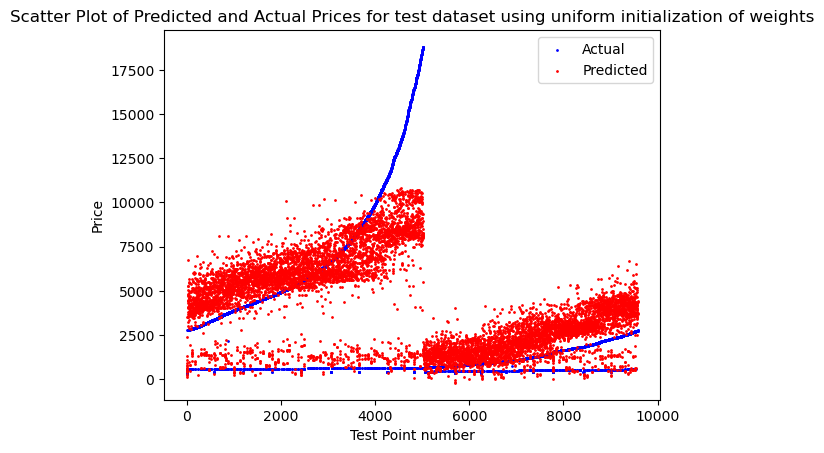

In [19]:
#Plotting y_test and y_pred values for the test dataset using scatter plot
plt.scatter(range(1,y_test.shape[0]+1), y_test, color='blue', label='Actual', s = 1)
plt.scatter(range(1,y_pred_uni.shape[0]+1), y_pred_uni, color='red', label='Predicted', s = 1)
plt.xlabel('Test Point number')
plt.ylabel('Price')
plt.title('Scatter Plot of Predicted and Actual Prices for test dataset using uniform initialization of weights')
plt.legend()
plt.show()

In [20]:
#Random weight initialization using Normal Function
W_norm = np.hstack((np.ones(1),np.random.normal(loc=0,scale=1,size=x_train.shape[1]-1)))

In [21]:
W_norm

array([ 1.        ,  0.23108855, -0.28805105, -1.74195592,  1.04384458,
       -0.4661801 ,  0.57306768, -0.66538194,  1.66947101, -0.59682066,
        0.16110064, -0.42108107,  0.07681342,  1.07096852,  1.1661473 ,
        0.50795224, -0.05544598, -1.61769815,  0.06254001, -1.04022324])

In [22]:
W_norm_trained,time_norm = gradient_descent(W_norm)

No. of iterations completed : 10000


In [23]:
W_norm_trained

array([-5.06264287e+02,  3.29622713e+03, -3.35398009e+00,  3.35662862e+03,
        3.38142360e+03,  2.63287727e+03, -2.84519457e+02, -3.71276196e+02,
       -1.35048256e+02,  1.65256803e+01,  2.61882060e+01,  2.01887024e+02,
        3.97811088e+01, -1.91449626e+02, -3.30400520e+02, -6.78674528e+01,
        5.82178403e+01,  2.45651877e+01, -9.36213576e+01,  9.34092266e+01])

In [24]:
# Predicting the price value using calculated weights for test dataset
y_pred_norm = ((np.dot(W_norm_trained,x_test.T)).T)
print("Shape of y_pred for Normal distribution initialization of weights {}".format(y_pred_uni.shape))

Shape of y_pred for Normal distribution initialization of weights (9575,)


In [25]:
#Calculating mse value
mse_norm = np.mean(np.power((y_pred_norm-y_test),2))
print("Mean Square Error for normal distribution initialization of weights is {}".format(mse_norm))

Mean Square Error for normal distribution initialization of weights is 4573023.200025927


In [26]:
#Calculating R2 score value
r2_norm = 1 - (np.mean(np.power((y_pred_norm-y_test),2)) / np.mean(np.power((y_test-np.mean(y_test)),2)))
print("R2 score for normal distribution initialization of weights is {}".format(r2_norm))

R2 score for normal distribution initialization of weights is 0.7069829995620434


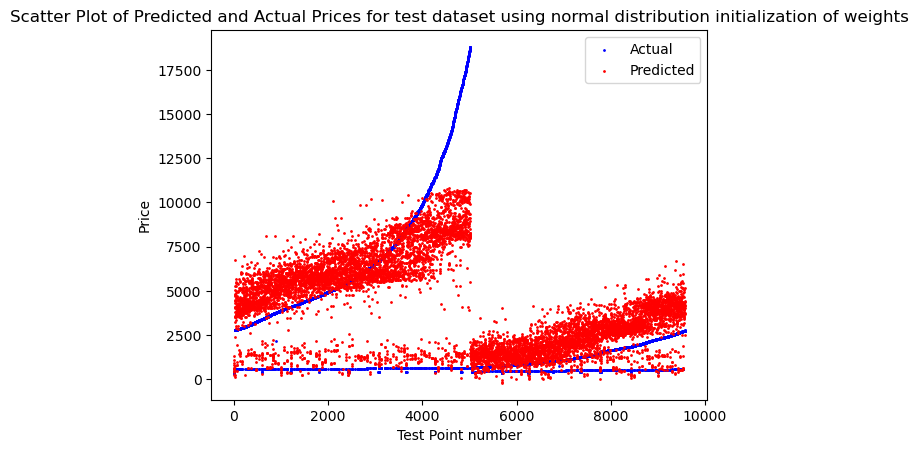

In [27]:
#Plotting y_test and y_pred values for the test dataset using scatter plot
plt.scatter(range(1,y_test.shape[0]+1), y_test, color='blue', label='Actual', s = 1)
plt.scatter(range(1,y_pred_norm.shape[0]+1), y_pred_norm, color='red', label='Predicted', s = 1)
plt.xlabel('Test Point number')
plt.ylabel('Price')
plt.title('Scatter Plot of Predicted and Actual Prices for test dataset using normal distribution initialization of weights')
plt.legend()
plt.show()

In [28]:
#Random weight initialization using Xavier Initialization
bound = np.sqrt(6)/((x_train.shape[1]-1) + 1)
W_xavier = np.hstack((np.ones(1),np.random.uniform(low=-bound,high=bound,size=x_train.shape[1]-1)))

In [29]:
W_xavier

array([ 1.        ,  0.04060981,  0.01562814,  0.04913332, -0.03511252,
        0.0628604 ,  0.08017659,  0.01882676, -0.09016078, -0.11684473,
       -0.08866437,  0.0207468 , -0.04078086,  0.03125045, -0.0547312 ,
        0.00674584, -0.08306144, -0.07814088, -0.04019113, -0.03110857])

In [30]:
W_xavier_trained,time_xavier = gradient_descent(W_xavier)

No. of iterations completed : 10000


In [31]:
W_xavier_trained

array([-5.06440215e+02,  3.29592236e+03, -3.16914045e+00,  3.35823250e+03,
        3.38023374e+03,  2.63325206e+03, -2.84751280e+02, -3.71314399e+02,
       -1.35498833e+02,  1.63969196e+01,  2.60075118e+01,  2.01918033e+02,
        3.96164911e+01, -1.92338587e+02, -3.30492322e+02, -6.79878295e+01,
        5.82258956e+01,  2.47357675e+01, -9.36272798e+01,  9.38271003e+01])

In [32]:
# Predicting the price value using calculated weights for test dataset
y_pred_xavier = ((np.dot(W_xavier_trained,x_test.T)).T)
print("Shape of y_pred for xavier initialization of weights {}".format(y_pred_xavier.shape))

Shape of y_pred for xavier initialization of weights (9575,)


In [33]:
#Calculating mse value
mse_xavier = np.mean(np.power((y_pred_xavier-y_test),2))
print("Mean Square Error for xavier initialization of weights is {}".format(mse_xavier))

Mean Square Error for xavier initialization of weights is 4572785.836446587


In [34]:
#Calculating R2 score value
r2_xavier = 1 - (np.mean(np.power((y_pred_xavier-y_test),2)) / np.mean(np.power((y_test-np.mean(y_test)),2)))
print("R2 score for xavier initialization of weights is {}".format(r2_xavier))

R2 score for xavier initialization of weights is 0.7069982086613611


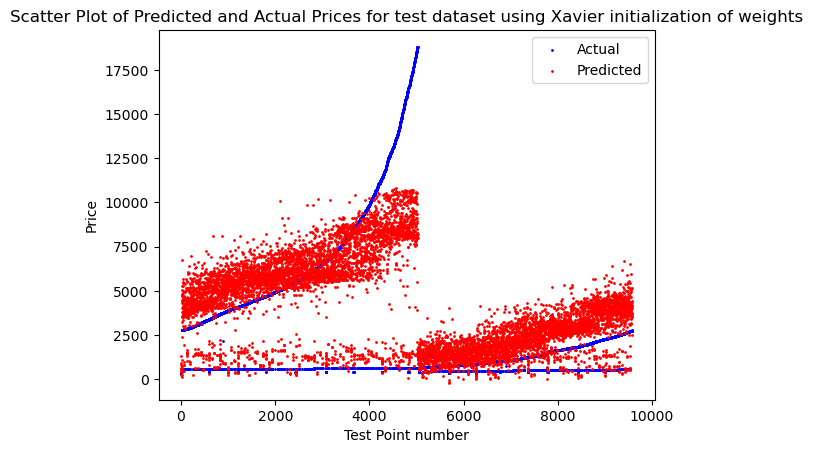

In [35]:
#Plotting y_test and y_pred values for the test dataset using scatter plot
plt.scatter(range(1,y_test.shape[0]+1), y_test, color='blue', label='Actual', s = 1)
plt.scatter(range(1,y_pred_xavier.shape[0]+1), y_pred_xavier, color='red', label='Predicted', s = 1)
plt.xlabel('Test Point number')
plt.ylabel('Price')
plt.title('Scatter Plot of Predicted and Actual Prices for test dataset using Xavier initialization of weights')
plt.legend()
plt.show()

# Gradient Descent for Elastic Net Regression

In [36]:
def gradient_descent_elastic(W, iter_num = 10000, lr = 0.001, thresh = 0.01, lambda_elastic = 100, l1_ratio = 0.9):
    ridge_lambda = lambda_elastic*(1-l1_ratio)
    lasso_lambda = lambda_elastic*(l1_ratio)
    t1 = time.time()
    for i in range(iter_num):
        gradient = (np.dot((np.multiply(x_train,W.T).sum(axis = 1) - y_train),x_train).flatten() + ridge_lambda*W + lasso_lambda*np.where(W >= 0 , 1 , -1))/(y_train.shape[0])
        if np.all(lr*np.abs(gradient) < thresh):
            break
        W -= (lr)*gradient
    t2 = time.time()
    print("No. of iterations completed : {}".format(i+1))
    time_duration = time.gmtime(t2-t1)
    return W, "Time elapsed ~ {} hrs : {} min : {} sec".format(time_duration.tm_hour,time_duration.tm_min,time_duration.tm_sec)

In [37]:
#Random weight initialization using Uniform Function
W_elastic = np.hstack((np.ones(1),np.random.uniform(low=0,high=1,size=x_train.shape[1]-1)))

In [38]:
W_elastic

array([1.        , 0.31996528, 0.22329598, 0.23235038, 0.8037138 ,
       0.96239812, 0.88690343, 0.74191228, 0.09037198, 0.54150778,
       0.14056065, 0.02597145, 0.24660904, 0.1275272 , 0.31268876,
       0.73893183, 0.55856657, 0.42414017, 0.45499888, 0.74179436])

In [39]:
W_elastic_trained,time_elastic = gradient_descent_elastic(W_elastic)

No. of iterations completed : 10000


In [40]:
W_elastic_trained

array([-529.14579598, 3321.26731446,  -11.83351833, 3384.075     ,
       3406.87439158, 2650.66979871, -287.78788604, -375.14725051,
       -138.80587343,   13.42935661,   22.41215375,  200.44395009,
         37.92169166, -195.18078568, -337.47993237,  -74.61463134,
         57.06266939,   22.14311498,  -93.8080598 ,   95.03445238])

In [41]:
# Predicting the price value using calculated weights for test dataset
y_pred_elastic = ((np.dot(W_elastic_trained,x_test.T)).T)
print("Shape of y_pred for uniform initialization of weights {}".format(y_pred_elastic.shape))

Shape of y_pred for uniform initialization of weights (9575,)


In [42]:
#Calculating mse value
mse_elastic = np.mean(np.power((y_pred_elastic-y_test),2))
print("Mean Square Error for uniform initialization of weights is {}".format(mse_elastic))

Mean Square Error for uniform initialization of weights is 4538664.023941146


In [43]:
#Calculating R2 score value
r2_elastic = 1 - (np.mean(np.power((y_pred_elastic-y_test),2)) / np.mean(np.power((y_test-np.mean(y_test)),2)))
print("R2 score for uniform initialization of weights is {}".format(r2_elastic))

R2 score for uniform initialization of weights is 0.7091845678186455


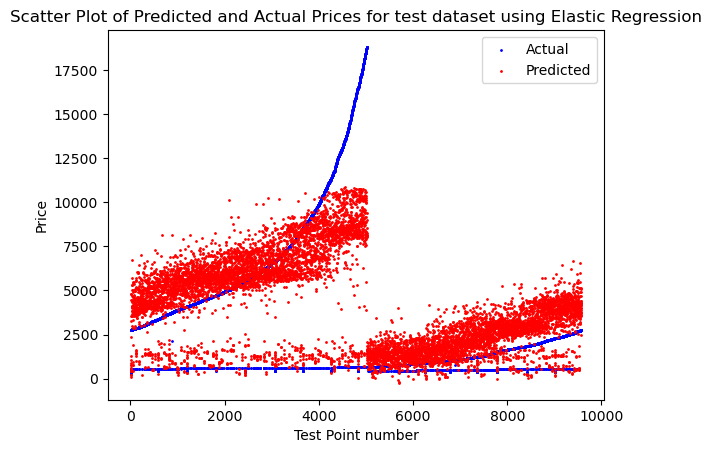

In [44]:
#Plotting y_test and y_pred values for the test dataset using scatter plot
plt.scatter(range(1,y_test.shape[0]+1), y_test, color='blue', label='Actual', s = 1)
plt.scatter(range(1,y_pred_elastic.shape[0]+1), y_pred_elastic, color='red', label='Predicted', s = 1)
plt.xlabel('Test Point number')
plt.ylabel('Price')
plt.title('Scatter Plot of Predicted and Actual Prices for test dataset using Elastic Regression')
plt.legend()
plt.show()

# Analysis

In [45]:
print("Ridge R2 for Uniform Weights init {}".format(r2_uni))
print("Ridge R2 for Xavier Weights init {}".format(r2_xavier))
print("Ridge R2 for Normal Distribution Weights init {}".format(r2_norm))
print("Elastic Net R2 for Uniform Weights init {}".format(r2_elastic))

Ridge R2 for Uniform Weights init 0.7070102350114853
Ridge R2 for Xavier Weights init 0.7069982086613611
Ridge R2 for Normal Distribution Weights init 0.7069829995620434
Elastic Net R2 for Uniform Weights init 0.7091845678186455


In [46]:
print("Ridge MSE for Uniform Weights init {}".format(mse_uni))
print("Ridge MSE for Xavier Weights init {}".format(mse_xavier))
print("Ridge MSE for Normal Distribution Weights init {}".format(mse_norm))
print("Elastic Net MSE for Uniform Weights init {}".format(mse_elastic))

Ridge MSE for Uniform Weights init 4572598.145022377
Ridge MSE for Xavier Weights init 4572785.836446587
Ridge MSE for Normal Distribution Weights init 4573023.200025927
Elastic Net MSE for Uniform Weights init 4538664.023941146


In [47]:
print("Ridge using Uniform Weights init {}".format(time_uni))
print("Ridge using Xavier Weights init {}".format(time_xavier))
print("Ridge using Normal Distribution Weights init {}".format(time_norm))
print("Elastic Net using Uniform Weights init {}".format(time_elastic))

Ridge using Uniform Weights init Time elapsed ~ 0 hrs : 1 min : 11 sec
Ridge using Xavier Weights init Time elapsed ~ 0 hrs : 1 min : 11 sec
Ridge using Normal Distribution Weights init Time elapsed ~ 0 hrs : 1 min : 12 sec
Elastic Net using Uniform Weights init Time elapsed ~ 0 hrs : 1 min : 14 sec


## Summary of Analysis

For Ridge Regression, we employ three weights initialization techniques:
1) Uniform Initialization
2) Xavier Initialization
3) Normal Distribution Initialization

We set the lambda parameter to be 100 and number of iterations 10000 with learning rate of 0.001.

We can observe that for all the three initialization methods, the R2 score and Mean Square Error is relatively the same and running time is also similar. This behaviour is for this particular dataset and may not be replicated for other datasets.

For Elastic Net Regression, we employ Uniform Distribution Weight initialization technique. 

We set the lambda parameter to be same as Ridge Regression i.e. 100 and we set the l1 ratio parameter to be 0.9. As l1 ratio paramter is used to give the weightage to Lasso Regression compared to Ridge Regression, setting to a value close to 1, we provide Lasso regression higher weightage in the loss function. We have done this as the number of features is high and Lasso regression helps to attenuate the effect of features whose weights are closer to zero. 

We can observe that the R2 score increases marginally and the Mean Squared Error reduces marginally. But we can also observe the running time is a few seconds more than the Ridge Regression methods.

#### References
1) https://docs.python.org/3/index.html
2) https://matplotlib.org/stable/
3) https://pandas.pydata.org/docs/reference/index.html
4) https://numpy.org/doc/stable/index.html